In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_file = open('C:\\Users\\Nick Siddharth\\Downloads\\Polynomial\\Project code','r')
data = []
x = []
y = []
input_x = []
output_y = []


def getting_data():
    for i in data_file.readlines():
        data.append(i.replace("\n", ""))
    
    for j in data:
        x.append(j.split(" ")[0])
        y.append(j.split(" ")[-1])
    
    for j in x:
        if j == 'x':
            continue
        input_x.append(float(j))
    for k in y:
        if k == 'y':
            continue
        output_y.append(float(k))

def visualize_data(temp_flag):
    if temp_flag == 1:
        num_samples = 15
    elif temp_flag == 2:
        num_samples = 20
    elif temp_flag == 3:
        num_samples = 80
    elif temp_flag == 4:
        num_samples = 100
        
    df = pd.DataFrame({'x_0': input_x[:num_samples], 'y_o': output_y[:num_samples]})
    ax = df.plot(kind='scatter', x='x_0', y='y_o')
    ax.set_xlabel('Input')
    ax.set_ylabel('Output')
    plt.show()
    
    return df

def reg_hypothesis(X, theta):
     return np.dot(X, theta)

def loss_func(X, y, theta, reg=0):
    y_pred = reg_hypothesis(X, theta)
    error = np.abs(y_pred - y)
    flag = error > delta
    cost = np.absolute(np.sum((~flag)*0.5*(error**2) - (flag*delta*error)-0.5*delta**2))
    regularization = np.array([0.0])
    if reg:
        for i in range(0, len(theta)):
            regularization[0] += np.absolute(theta[i])
        return cost+lam_bda*regularization[0]
    return cost

def learning_algo(X, y, theta, alpha, num_epochs, reg=0):
    
    J = []  # list to store loss values
    
    for epoch in range(num_epochs):
        # Calculate predictions
        y_pred = reg_hypothesis(X, theta)
        
        # Update each parameter
        for j in range(len(theta)):
            if sum(abs(y_pred - y)) <= delta:
                theta[j] -= alpha*(sum((y_pred-y)* X.iloc[:, j])+lam_bda*regularization[0])/m
            else:
                theta[j] -= delta*alpha*(sum(X.iloc[:, j]*(y_pred - y) / abs(y - y_pred))+lam_bda*regularization)
        
        # Calculate loss and append to list
        J.append(loss_func(X, y, theta, reg))
    
    return J, theta


def visualize_results(iteration, degree, data_points, J=0):
    y_pred = reg_hypothesis(X_INPUT, theta)
    
    fig, ax = plt.subplots()
    ax.scatter(x=X_INPUT['x_0'], y=Y_OUTPUT)
    ax.scatter(x=X_INPUT['x_0'], y=y_pred)
    ax.set_xlabel('x_0')
    ax.set_ylabel('y')
    ax.set_title(f"reg_hypothesis plot for {iteration} iteration type, degree {degree}, and {data_points} data points")
    plt.show()
    
    if J:
        fig, ax = plt.subplots()
        ax.plot(J)
        ax.set_xlabel('Iterations')
        ax.set_ylabel('Loss')
        ax.set_title(f"Loss curve for {iteration} iteration type, degree {degree}, and {data_points} data points")
        plt.show()
        
        total = np.sum(J)
        normalized_J = J / total
        print(f"Noise variance: {np.var(normalized_J)}")
    
def test(x):
    df = visualize_data(x)
    visualize_results(5) 

getting_data()
df = visualize_data(2)
X_INPUT = pd.DataFrame()
Y_OUTPUT = df['y_o']
X_INPUT['x_0'] = df['x_0']
X_INPUT['x_1'] = X_INPUT['x_0']**2
X_INPUT['x_2'] = X_INPUT['x_0']**3
#X_INPUT['x_3'] = X_INPUT['x_0']**4
X_INPUT = pd.concat([pd.Series(1, index=X_INPUT.index, name='00'), X_INPUT], axis=1)


lam_bda = 0.05 
delta = 20 

m = len(X_INPUT)
regularization = np.array([0.0])
noise = []

theta = np.array([0.0]*len(X_INPUT.columns))
J, theta = learning_algo(X_INPUT, Y_OUTPUT, theta, 0.01, 2000)
visualize_results("Train",3,20, J)




PermissionError: [Errno 13] Permission denied: 'C:\\Users\\Nick Siddharth\\Downloads\\Polynomial\\Project code'

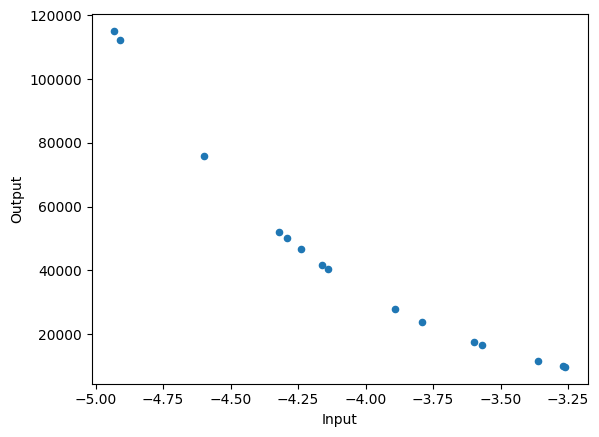

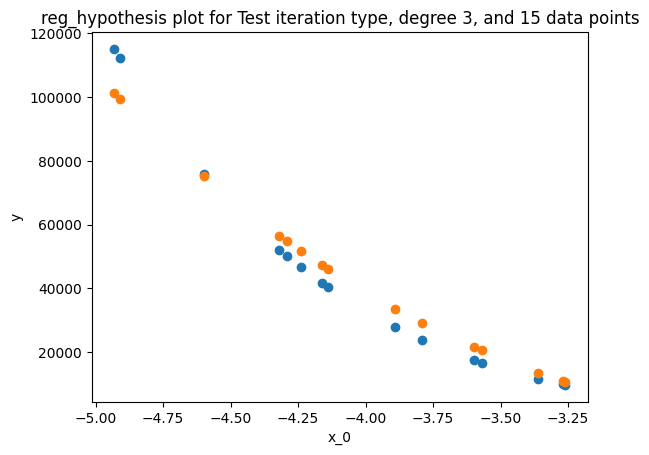

In [ ]:
df = visualize_data(1)
X_INPUT = pd.DataFrame()
Y_OUTPUT = df['y_o']
X_INPUT['x_0'] = df['x_0']
X_INPUT['x_1'] = X_INPUT['x_0']**2
X_INPUT['x_2'] = X_INPUT['x_0']**3
# X_INPUT['x_3'] = X_INPUT['x_0']**4
X_INPUT = pd.concat([pd.Series(1, index=X_INPUT.index, name='00'), X_INPUT], axis=1)
visualize_results("Test",3,15)

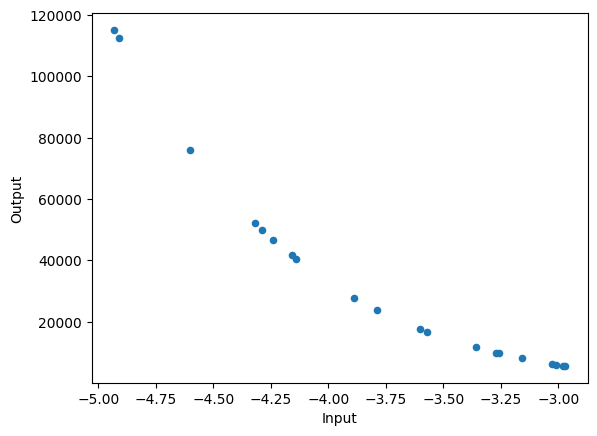

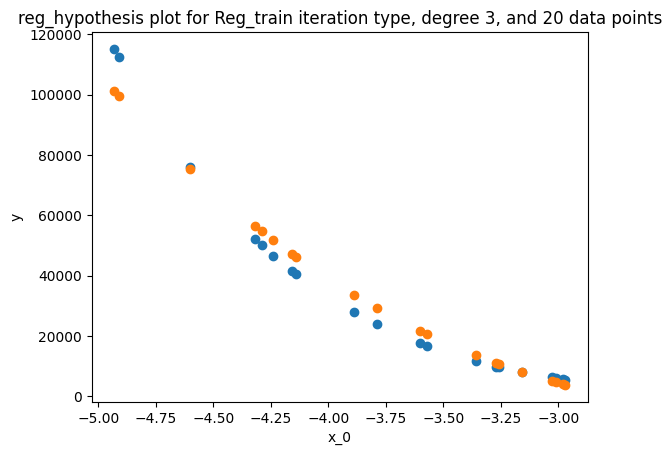

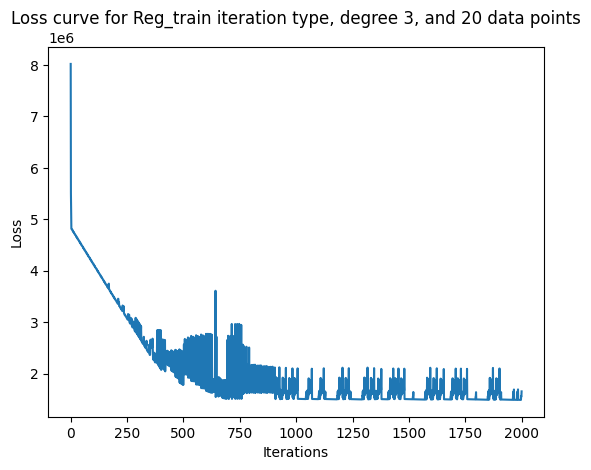

Noise variance: 4.02477012720902e-08


In [ ]:
#Train with regularization
df = visualize_data(2)
X_INPUT = pd.DataFrame()
Y_OUTPUT = df['y_o']
X_INPUT['x_0'] = df['x_0']
X_INPUT['x_1'] = X_INPUT['x_0']**2
X_INPUT['x_2'] = X_INPUT['x_0']**3
# X_INPUT['x_3'] = X_INPUT['x_0']**4
X_INPUT = pd.concat([pd.Series(1, index=X_INPUT.index, name='00'), X_INPUT], axis=1)
theta = np.array([0.0]*len(X_INPUT.columns))
J, theta = learning_algo(X_INPUT, Y_OUTPUT, theta, 0.01, 2000,1)
visualize_results("Reg_train",3,20, J)

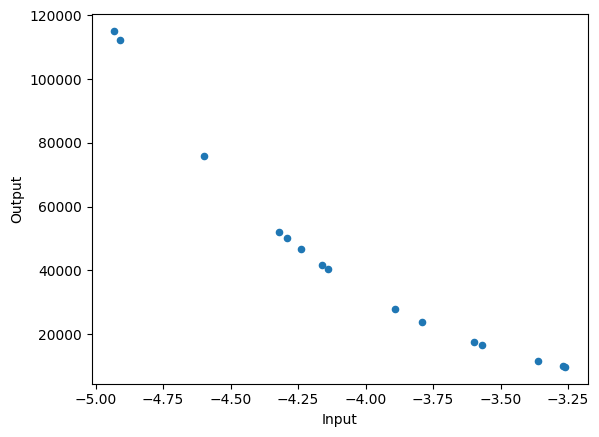

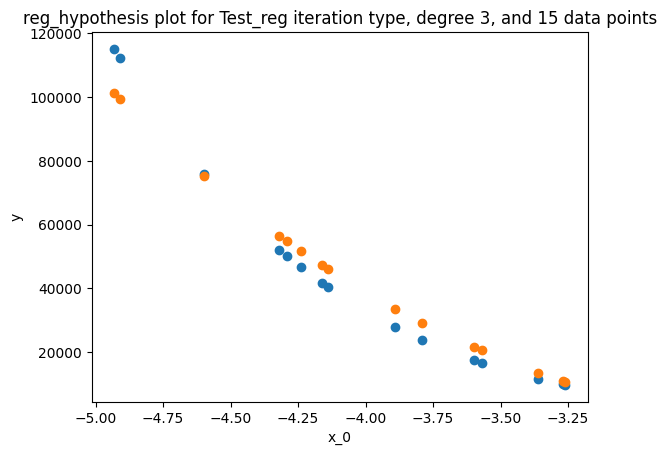

In [ ]:
df = visualize_data(1)
X_INPUT = pd.DataFrame()
Y_OUTPUT = df['y_o']
X_INPUT['x_0'] = df['x_0']
X_INPUT['x_1'] = X_INPUT['x_0']**2
X_INPUT['x_2'] = X_INPUT['x_0']**3
# X_INPUT['x_3'] = X_INPUT['x_0']**4
X_INPUT = pd.concat([pd.Series(1, index=X_INPUT.index, name='00'), X_INPUT], axis=1)
visualize_results("Test_reg",3,15)

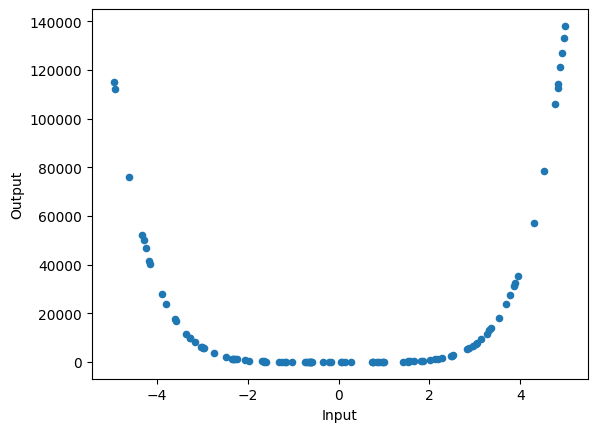

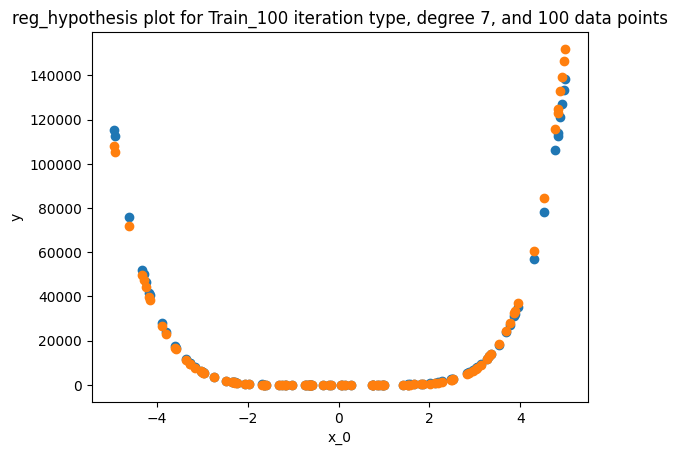

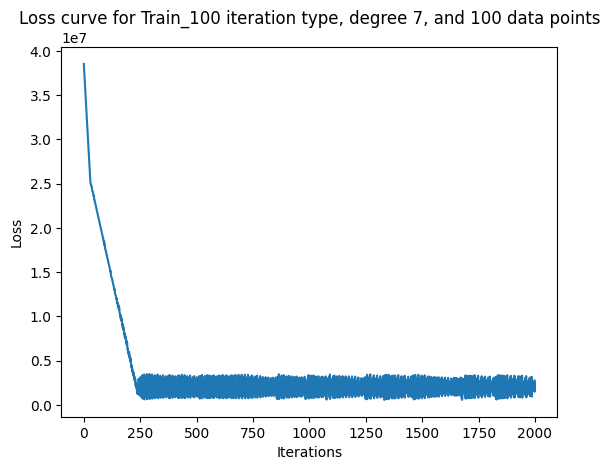

Noise variance: 5.786154501947346e-07


In [ ]:
################################################  100 Data Points Started  ####################################################
df = visualize_data(4)
X_INPUT = pd.DataFrame()
Y_OUTPUT = df['y_o']

X_INPUT['x_0'] = df['x_0']
X_INPUT['x_1'] = X_INPUT['x_0']**2
X_INPUT['x_2'] = X_INPUT['x_0']**3
X_INPUT['x_3'] = X_INPUT['x_0']**4
X_INPUT['x_4'] = X_INPUT['x_0']**5
X_INPUT['x_5'] = X_INPUT['x_0']**6
X_INPUT['x_6'] = X_INPUT['x_0']**7
# X_INPUT['x_7'] = X_INPUT['x_0']**8

X_INPUT = pd.concat([pd.Series(1, index=X_INPUT.index, name='00'), X_INPUT], axis=1)
theta = np.array([0.0]*len(X_INPUT.columns))
J, theta = learning_algo(X_INPUT, Y_OUTPUT, theta, 0.00000001, 2000)
visualize_results("Train_100",7,100, J)


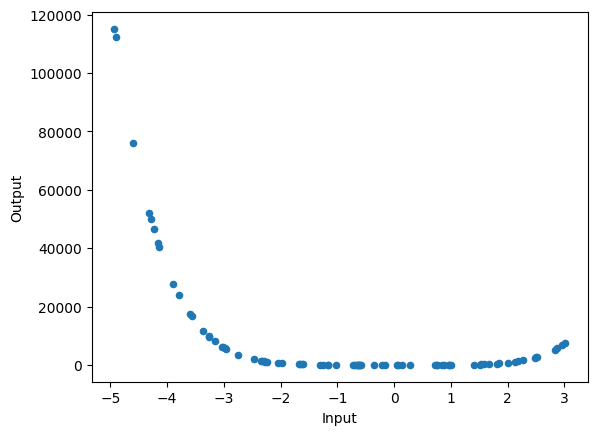

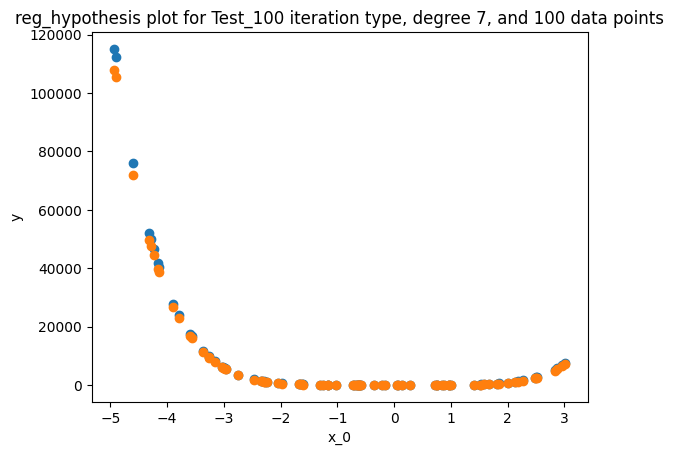

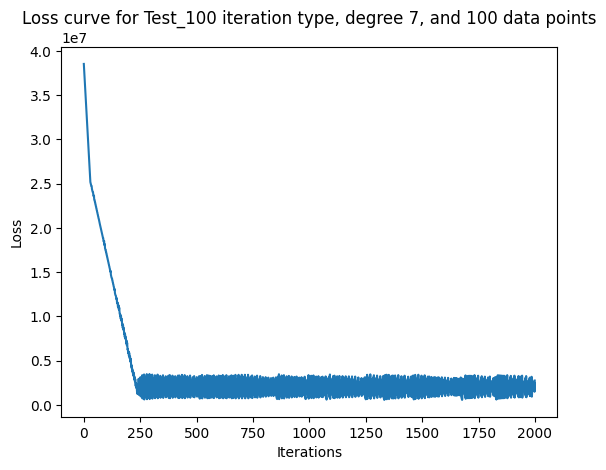

Noise variance: 5.786154501947346e-07


In [ ]:
df = visualize_data(3)
X_INPUT = pd.DataFrame()
Y_OUTPUT = df['y_o']

X_INPUT['x_0'] = df['x_0']
X_INPUT['x_1'] = X_INPUT['x_0']**2
X_INPUT['x_2'] = X_INPUT['x_0']**3
X_INPUT['x_3'] = X_INPUT['x_0']**4
X_INPUT['x_4'] = X_INPUT['x_0']**5
X_INPUT['x_5'] = X_INPUT['x_0']**6
X_INPUT['x_6'] = X_INPUT['x_0']**7
# X_INPUT['x_7'] = X_INPUT['x_0']**8

X_INPUT = pd.concat([pd.Series(1, index=X_INPUT.index, name='00'), X_INPUT], axis=1)
visualize_results("Test_100",7,100, J)

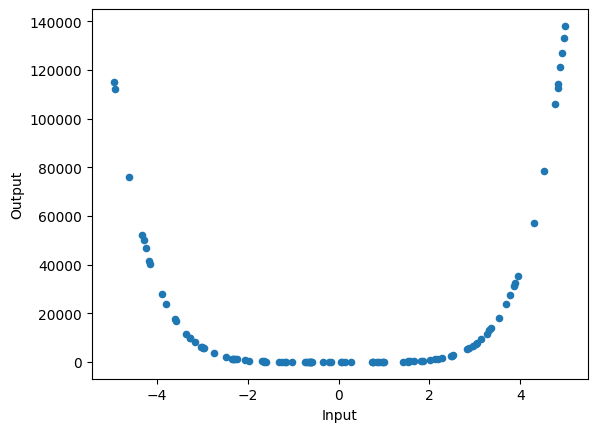

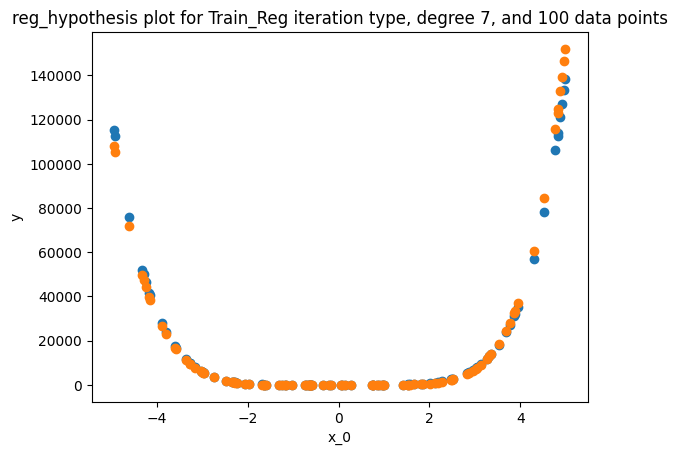

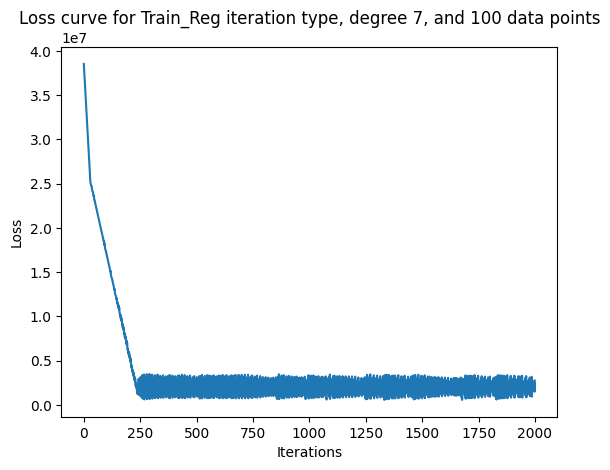

Noise variance: 5.786152827012938e-07


In [ ]:
df = visualize_data(4)
X_INPUT = pd.DataFrame()
Y_OUTPUT = df['y_o']
X_INPUT['x_0'] = df['x_0']
X_INPUT['x_1'] = X_INPUT['x_0']**2
X_INPUT['x_2'] = X_INPUT['x_0']**3
X_INPUT['x_3'] = X_INPUT['x_0']**4
X_INPUT['x_4'] = X_INPUT['x_0']**5
X_INPUT['x_5'] = X_INPUT['x_0']**6
X_INPUT['x_6'] = X_INPUT['x_0']**7
# X_INPUT['x_7'] = X_INPUT['x_0']**8
X_INPUT = pd.concat([pd.Series(1, index=X_INPUT.index, name='00'), X_INPUT], axis=1)
theta = np.array([0.0]*len(X_INPUT.columns))
J, theta = learning_algo(X_INPUT, Y_OUTPUT, theta, 0.00000001, 2000,1)
visualize_results("Train_Reg",7,100, J)

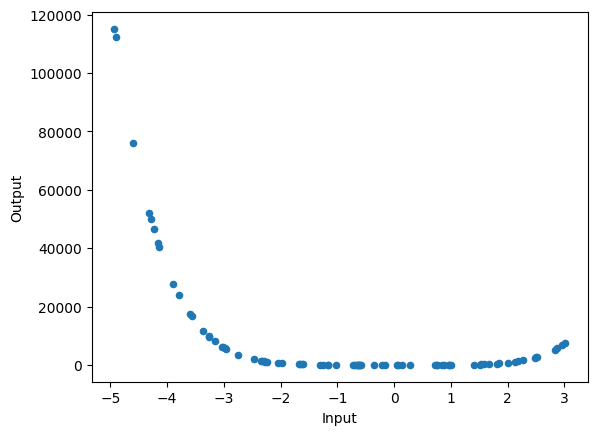

L1 Reguralization Testing for 100 points


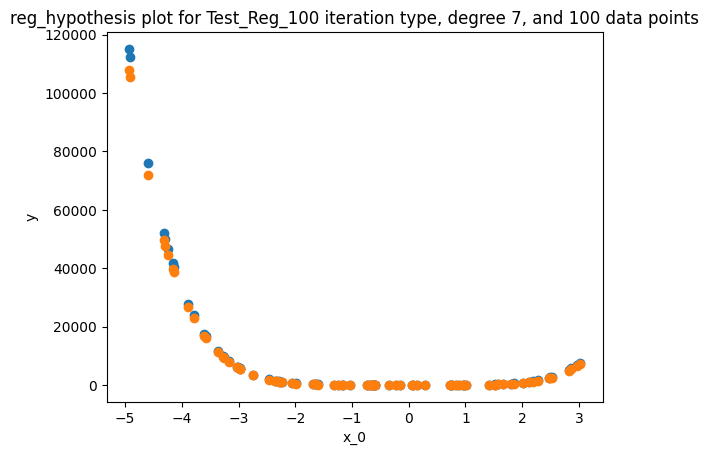

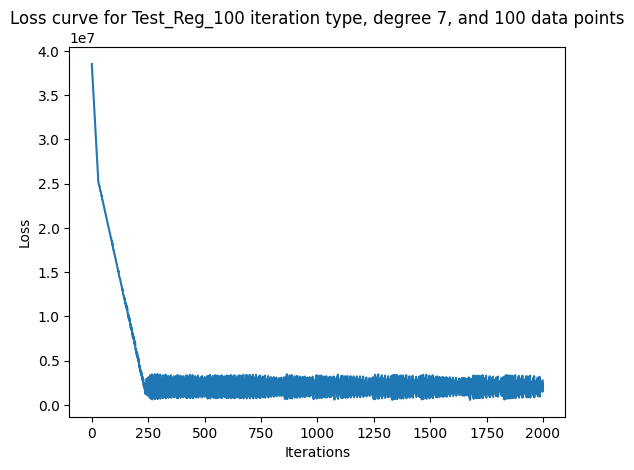

Noise variance: 5.786152827012938e-07


In [ ]:
df = visualize_data(3)
X_INPUT = pd.DataFrame()
Y_OUTPUT = df['y_o']
print("L1 Reguralization Testing for 100 points")
X_INPUT['x_0'] = df['x_0']
X_INPUT['x_1'] = X_INPUT['x_0']**2
X_INPUT['x_2'] = X_INPUT['x_0']**3
X_INPUT['x_3'] = X_INPUT['x_0']**4
X_INPUT['x_4'] = X_INPUT['x_0']**5
X_INPUT['x_5'] = X_INPUT['x_0']**6
X_INPUT['x_6'] = X_INPUT['x_0']**7
# X_INPUT['x_7'] = X_INPUT['x_0']**8

X_INPUT = pd.concat([pd.Series(1, index=X_INPUT.index, name='00'), X_INPUT], axis=1)
visualize_results("Test_Reg_100",7,100, J)
